In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
import random

random.seed(42)
np.random.seed(42)
torch.manual_seed(42)
if torch.cuda.is_available():
    torch.cuda.manual_seed(42)
    torch.cuda.manual_seed_all(42) 

torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
torch.use_deterministic_algorithms(True)

In [2]:
n_samples = 100
X = pd.DataFrame(np.random.randn(n_samples, 1), columns = ['X1'])
y = 3 * pd.Series(X.values.squeeze()) + 2 + pd.Series(np.random.randn(n_samples).squeeze(), name='y')

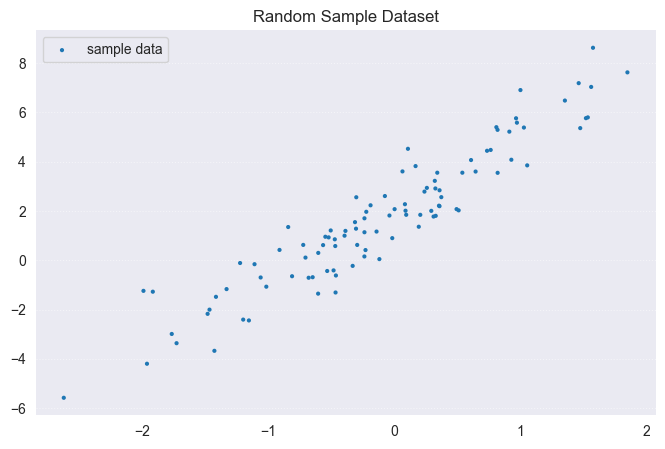

In [3]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (8, 5))
plt.scatter(X, y, label = 'sample data', lw = 0.5, marker = '.', edgecolor = 'None')
for spine in ax.spines.values():
    spine.set_visible(False)
ax.grid(False)
ax.yaxis.grid(True, ls = ':', alpha = 0.5) 
plt.legend()
plt.title('Random Sample Dataset')
plt.show()

In [4]:
from FinancialDeepLearning.regression.linear_model import LinearNet
linear_net = LinearNet(X, y)

In [5]:
linear_net_fit = linear_net.fit(
    criterion = 'MSE',
    optimizer = 'SGD',
    activation_function = None,
    learning_rate = 0.01,
    num_epochs = 10
)

100%|██████████| 10/10 [00:00<00:00, 3344.74it/s]


In [6]:
weights = linear_net_fit.linear.weight.detach().numpy().flatten() # coefficient
bias = linear_net_fit.linear.bias.detach().numpy().flatten()

np.append(bias, weights)

array([1.0083823, 1.0649785], dtype=float32)

In [7]:
print(linear_net.summary())

                    LinearNet Results
Dep. Variable:    predicted        MSE:           4.1659  
Model:            LinearNet        Log Likelihood -214.251
Date:             Tue, 24 Sep 2024 AIC            434.502 
Time:             14:53:26         BIC            442.318 
Sample:           100              HQIC           437.665 
No. Observations: 100              n_cols         2.0000  
R-squared:        0.4480                                  
------------------------------------------------------------
         coef    std err     t      P>|t|    [0.025   0.975]
------------------------------------------------------------
const   1.0084    0.2037   5.2271   0.0000   0.6656   1.4643
X1      1.0650    0.2259   4.7149   0.0000   0.6223   1.5077
----------------------------------------------------------
Jarque-Bera Test:     0.54    Durbin-Watson:         1.86 
Prob(JB):             0.76    Breusch-Pagan Test:    23.13
Skew:                 0.18    Prob(H):               0.00 
Kurtosis